<a href="https://colab.research.google.com/github/jtunde/Python/blob/main/cn2%20ARIMA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('drive/MyDrive/data.csv',index_col='TIME',parse_dates=True)
df.index.freq='D'
print(df.index.freq)
print(df.head())

<Day>
               RON
TIME              
2021-01-01  4.9493
2021-01-02  4.9493
2021-01-03  4.9493
2021-01-04  4.8713
2021-01-05  4.8721


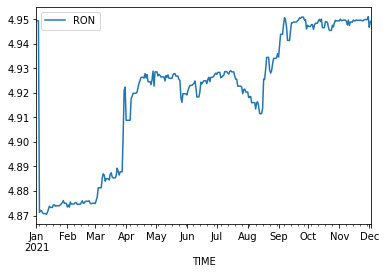

In [4]:
df.plot()

In [5]:
len(df)

337